In [2]:
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Data

In [3]:
data = pd.read_csv('xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


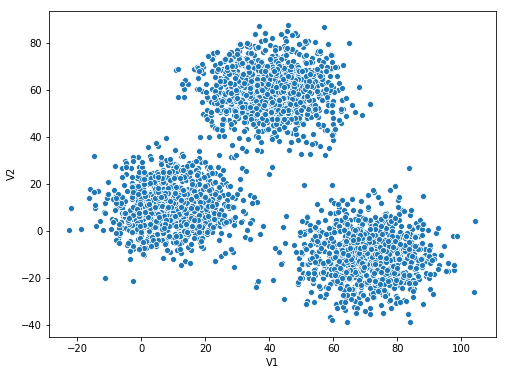

In [4]:
# let's plot this data
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
sns.scatterplot(x="V1", y="V2",data=data, ax=ax1)
# sns.scatterplot(centroid_xvalues, centroid_yvalues, ax=ax1) # how to plot two scatter plots in one figure

In [5]:
# looking at the data, we already know that there are 3 clusters

In [6]:
# function to calculate the euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.square(x1 - x2).sum())

In [7]:
# testing the distance function
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])
euclidean_distance(a, b)

3.4641016151377544

# Initializing the Parameters

In [8]:
# let's initialize some parameters
m = data.shape[0] # number of examples
n = data.shape[1] # number of features
k = 3 # number of clusters

In [9]:
# now, we need to choose k random examples as centroids
centroid_current = data.sample(3).values # the dimensions of the centroid are k * n

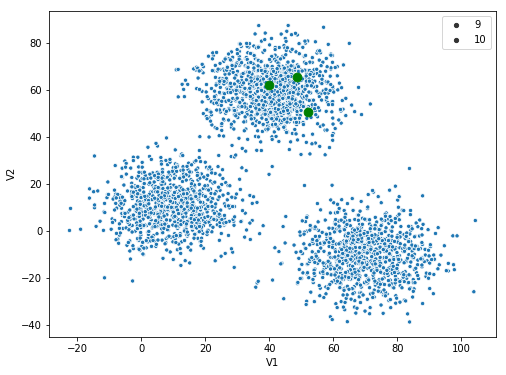

In [10]:
# let's plot our centroids

centroid_xvalues = []
centroid_yvalues = []
for i, j in centroid_current:
    centroid_xvalues.append(i)
    centroid_yvalues.append(j)
    
# let's plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="V1", y="V2",data=data, size=10)
plt.scatter(centroid_xvalues, centroid_yvalues, s=75, color="g", marker='o')

# K-Means Clustering Algorithm

In [11]:
# the K-means clustering algorithm

centroid_prev = np.zeros(centroid_current.shape) # to store the old values of centroid
error = euclidean_distance(centroid_current, centroid_prev) # distance between old and new centroids

# this is used to store to which centroid label the sample is close to, for all samples 
clusters = np.zeros(m)
# this is used to store the distances of all points to each of the centroid
distances = np.zeros((m, k)) # m samples and k centroids

# When, after an update, the estimate of that center stays the same, exit loop
while error!=0:
    # Measure the distance of all samples to every centroid
    for i in range(k):
        distance_func = lambda x: euclidean_distance(x, centroid_current[i])
        distances[:, i] = np.array(list(map(distance_func, data.values)))
    
    # now, based on the calculated distances, we find out which samples are close to which centroid, for example
    # this array, [1, 0, 2, 0, 1.....] indicates that sample 1 is close to centroid 1, 2 to 0, 3 to 2 and so on...
    clusters = np.argmin(distances, axis=1)
    
    # we update the previous values
    centroid_prev = deepcopy(centroid_current)
    
    # Now we calculate the new values for centroid
    # by taking the mean of all the samples that are close to this particular centroid
    for i in range(k):
        centroid_current[i] = np.mean(data[clusters==i])
    
    # we update the error value
    error = euclidean_distance(centroid_current, centroid_prev)

In [12]:
centroid_current

array([[ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ],
       [ 40.68362784,  59.71589274]])

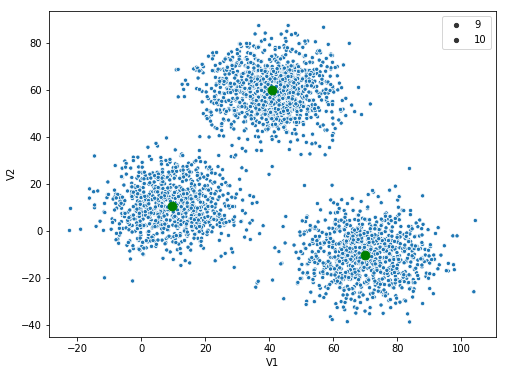

In [13]:
# plotting again with updated centroid values

centroid_xvalues = []
centroid_yvalues = []
for i, j in centroid_current:
    centroid_xvalues.append(i)
    centroid_yvalues.append(j)
    
# let's plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="V1", y="V2",data=data, size=10)
plt.scatter(centroid_xvalues, centroid_yvalues, s=75, color="g", marker='o')

References:
<br>https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python
<br>https://mubaris.com/posts/kmeans-clustering/